In [1]:
import requests 
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [236]:
COINS = ['BTC','ETH','BNB','SOL','XRP','AVAX','DOGE','ADA',
         'TON','TRX', 'USDT', 'USDC', 'DAI', 'EURS', 'USTC', 'PYUSD', 'TUSD', 'USDP', 'GUSD','BUSD']

In [237]:
len(COINS)

20

In [10]:
import time

In [150]:
# Replace with your CryptoCompare API Key
API_KEY = 'a06c28d8d81f498ab4c71ca730265e91fee70c0ccbace8737984a4f2518c2fea'

def fetch_crypto_historical_data(crypto, vs_currency='USD'):
    """
    Fetch the current prices of a list of cryptocurrencies from CCData (CryptoCompare) API.
    
    :param cryptos: List of cryptocurrency symbols (e.g., ['BTC', 'ETH']).
    :param vs_currency: The currency in which to fetch the prices (e.g., 'USD').
    :return: A dictionary with the crypto symbols as keys and their prices as values.
    """
    url = "https://min-api.cryptocompare.com/data/v2/histoday"
    params = {
        'api_key': API_KEY,
        'toTs':1726912698,
        'limit': '365',
        'tryConversion':'false',
        'e':'CCCAGG',
        'fsym': crypto,  # List of cryptos separated by commas (e.g., 'BTC,ETH')
        'tsym': 'USD'  # Currency in which to return the prices (e.g., 'USD')
    }
    
    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        data = response.json()
        main_data = data['Data']['Data']
        return main_data  # List of historical data points
    else:
        print(f"Failed to fetch data for {crypto}. Status code: {response.status_code}")
        return None

def fetch_and_store_historical_data(cryptos):
    """
    Fetch historical price data for a list of cryptocurrencies and store them in a CSV file.
    
    :param cryptos: List of cryptocurrency symbols to fetch (e.g., ['BTC', 'ETH']).
    :param vs_currency: The currency in which to fetch the historical data (e.g., 'USD').
    :param limit: Number of historical data points (days) for each cryptocurrency.
    """
    all_data = []  # To store all the historical data from multiple cryptos
    
    for crypto in cryptos:
        print(f"Fetching historical data for {crypto}...")
        data = fetch_crypto_historical_data(crypto)
        
        if data is not None:
            for entry in data:
                # Prepare each row with timestamp, cryptocurrency, and its historical price data
                row = {
                    'Timestamp': pd.to_datetime(entry['time'], unit='s'),  # Convert to datetime
                    'Crypto': crypto,
                    'Close Price': entry['close']
                }
                all_data.append(row)
        
        # Delay to avoid hitting API limits
        time.sleep(6)
    
    # Convert the data to a pandas DataFrame
    df = pd.DataFrame(all_data)
    
    # Save the DataFrame to a CSV file
    df.to_csv('crypto_historical_prices.csv', index=False)
    print("Historical data saved to crypto_historical_prices.csv")

In [151]:
fetch_and_store_historical_data(COINS)

Fetching historical data for BTC...
Fetching historical data for ETH...
Fetching historical data for BNB...
Fetching historical data for SOL...
Fetching historical data for XRP...
Fetching historical data for AVAX...
Fetching historical data for DOGE...
Fetching historical data for ADA...
Fetching historical data for TON...
Fetching historical data for TRX...
Fetching historical data for USDT...
Fetching historical data for USDC...
Fetching historical data for DAI...
Fetching historical data for EURS...
Fetching historical data for USTC...
Fetching historical data for PYUSD...
Fetching historical data for TUSD...
Fetching historical data for USDP...
Fetching historical data for GUSD...
Fetching historical data for BUSD...
Historical data saved to crypto_historical_prices.csv


In [152]:
df = pd.read_csv('crypto_historical_prices.csv')

In [153]:
pivot_df = df.pivot(index='Timestamp', columns='Crypto', values='Close Price')

In [154]:
pivot_df.index = pd.to_datetime(pivot_df.index)

In [155]:
print(pivot_df.head())
len(pivot_df)

Crypto         ADA   AVAX     BNB       BTC    BUSD     DAI     DOGE      ETH  \
Timestamp                                                                       
2023-09-22  0.2450  8.860  210.91  26583.16  0.9772  0.9999  0.06152  1593.13   
2023-09-23  0.2462  8.900  210.27  26585.41  0.9772  1.0000  0.06151  1593.91   
2023-09-24  0.2428  8.788  208.21  26261.44  0.9772  0.9998  0.06070  1580.76   
2023-09-25  0.2459  8.940  209.81  26297.93  0.9772  0.9999  0.06093  1588.04   
2023-09-26  0.2453  9.042  212.43  26212.59  0.9772  0.9999  0.06059  1593.27   

Crypto      EURS   GUSD  PYUSD    SOL  TON      TRX    TUSD  USDC    USDP  \
Timestamp                                                                   
2023-09-22  0.92  1.001    1.0  19.42  0.0  0.08338  0.5095   1.0  0.9997   
2023-09-23  0.92  1.001    1.0  19.48  0.0  0.08365  0.9000   1.0  0.9971   
2023-09-24  0.92  0.999    1.0  19.36  0.0  0.08362  0.8300   1.0  0.9985   
2023-09-25  0.92  0.999    1.0  19.39  0.0  0.0

366

In [156]:
pivot_df.head()

Crypto,ADA,AVAX,BNB,BTC,BUSD,DAI,DOGE,ETH,EURS,GUSD,PYUSD,SOL,TON,TRX,TUSD,USDC,USDP,USDT,USTC,XRP
Timestamp,,,,,,,,,,,,,,,,,,,,
2023-09-22,0.2450,8.860,210.91,26583.16,0.9772,0.9999,0.06152,1593.13,0.92,1.001,1.0,19.42,0.0,0.08338,0.5095,1.0,0.9997,1.0000,0.01241,0.5122
2023-09-23,0.2462,8.900,210.27,26585.41,0.9772,1.0000,0.06151,1593.91,0.92,1.001,1.0,19.48,0.0,0.08365,0.9000,1.0,0.9971,1.0010,0.01258,0.5077
2023-09-24,0.2428,8.788,208.21,26261.44,0.9772,0.9998,0.06070,1580.76,0.92,0.999,1.0,19.36,0.0,0.08362,0.8300,1.0,0.9985,1.0010,0.01246,0.5021
2023-09-25,0.2459,8.940,209.81,26297.93,0.9772,0.9999,0.06093,1588.04,0.92,0.999,1.0,19.39,0.0,0.08464,0.9007,1.0,0.9993,0.9998,0.01253,0.5054
2023-09-26,0.2453,9.042,212.43,26212.59,0.9772,0.9999,0.06059,1593.27,0.92,0.998,1.0,19.02,0.0,0.08472,0.8662,1.0,0.9991,0.9997,0.01266,0.5017


In [203]:
# 2. Calculate Daily Returns
returns = pivot_df.pct_change().dropna()

In [168]:
returns.head()

Crypto,ADA,AVAX,BNB,BTC,BUSD,DAI,DOGE,ETH,EURS,GUSD,PYUSD,SOL,TON,TRX,TUSD,USDC,USDP,USDT,USTC,XRP
Timestamp,,,,,,,,,,,,,,,,,,,,
2023-10-18,-0.014199,-0.021951,-0.005768,-0.002865,0.0,0.0001,-0.007619,-0.001112,0.0,0.000000,-0.0002,-0.022129,0.068623,0.006316,0.000120,0.0000,-0.002803,0.000000,-0.008834,-0.006717
2023-10-19,0.016872,0.018180,0.004565,0.014322,0.0,0.0000,0.004436,0.002488,0.0,0.001001,0.0000,0.064902,-0.018158,0.008630,-0.002279,0.0000,-0.001807,0.001000,-0.043672,0.065779
2023-10-20,0.017402,0.016422,0.003550,0.033083,0.0,0.0000,0.018006,0.023801,0.0,0.000000,0.0000,0.084202,-0.033378,0.008001,0.011902,0.0000,-0.000101,0.000000,0.035415,-0.009614
2023-10-21,0.029435,0.045326,0.009670,0.008075,0.0,0.0000,0.021191,0.015316,0.0,0.000000,0.0001,0.084689,0.057396,0.010032,-0.006178,-0.0001,0.002615,-0.000999,0.025203,0.011648
2023-10-22,0.020479,0.045643,0.017146,0.002585,0.0,-0.0004,0.008333,0.021320,0.0,0.000000,0.0000,-0.009547,-0.037952,-0.013316,0.000000,-0.0001,-0.002408,0.000000,0.003512,0.003070


In [171]:
cleaned_returns = returns.iloc[1:, :]

In [205]:
std_devs = cleaned_returns.std()
cleaned_returns = cleaned_returns.loc[:, std_devs != 0]

In [206]:
len(cleaned_returns)

340

In [218]:
cleaned_returns.columns

Index(['ADA', 'AVAX', 'BNB', 'BTC', 'DAI', 'DOGE', 'ETH', 'GUSD', 'PYUSD',
       'SOL', 'TON', 'TRX', 'TUSD', 'USDC', 'USDP', 'USDT', 'USTC', 'XRP'],
      dtype='object', name='Crypto')

In [215]:
# 3. Standardize the Data (z-score normalization)
scaler = StandardScaler()
returns_scaled = scaler.fit_transform(cleaned_returns)

In [217]:
returns_scaled

array([[-4.07949263e-01, -5.15753227e-01, -2.98870292e-01, ...,
        -2.18289969e-04, -1.33439617e-01, -2.35362078e-01],
       [ 3.80670710e-01,  2.64108917e-01,  3.47922155e-02, ...,
         2.29028112e+00, -4.67937636e-01,  1.94063268e+00],
       [ 3.94108292e-01,  2.29957244e-01,  2.02297660e-03, ...,
        -2.18289969e-04,  2.91413869e-01, -3.22307013e-01],
       ...,
       [ 4.53857677e-01,  1.45161221e+00,  3.32090423e-01, ...,
        -2.18289969e-04,  6.65494522e-01,  5.85568574e-02],
       [ 4.64346546e-02,  6.31906759e-01,  1.27157493e-02, ...,
        -2.18289969e-04, -3.29032332e-01, -1.30889097e-01],
       [ 3.99102672e-01, -4.89813710e-03,  9.99671085e-01, ...,
        -2.18289969e-04,  1.86736465e-01,  6.12516629e-01]])

In [219]:
# 4. Apply PCA
pca = PCA(n_components=None)  # We'll let PCA determine all components
pca.fit(returns_scaled)

PCA()

In [220]:
# 5. Explained Variance by Each Component
explained_variance = pca.explained_variance_ratio_

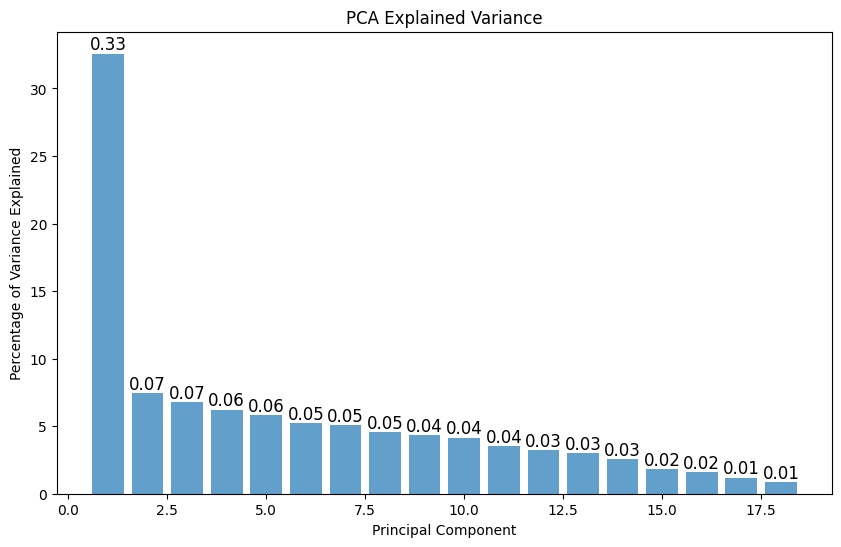

In [233]:
# Plot Explained Variance
plt.figure(figsize=(10, 6))
bars = plt.bar(range(1, len(explained_variance)+1), explained_variance * 100, alpha=0.7)
plt.ylabel('Percentage of Variance Explained')
plt.xlabel('Principal Component')
plt.savefig('bar.pdf') 
plt.title('PCA Explained Variance')
# Step 4: Annotate each bar with the exact explained variance value
for bar, var in zip(bars, explained_variance):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.01, 
             f'{var:.2f}', ha='center', va='bottom', fontsize=12)

plt.show()

In [224]:
# 6. Check the Principal Component Loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(explained_variance))], index=cleaned_returns.columns)

# Display Loadings (the higher the absolute value, the stronger the correlation)
print(loadings)

             PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
Crypto                                                                         
ADA     0.355275 -0.018332 -0.023328  0.007017  0.060601  0.053816  0.025780   
AVAX    0.328725 -0.092536 -0.073176  0.075091  0.169307  0.012171  0.103620   
BNB     0.282378 -0.000194  0.081594 -0.205037 -0.152431 -0.127965  0.089082   
BTC     0.366400  0.047441  0.003655 -0.136006 -0.026715 -0.027135  0.059982   
DAI    -0.019548  0.440828  0.360717  0.199077 -0.071197  0.554050  0.208116   
DOGE    0.336923 -0.036939  0.031813 -0.021083 -0.057726 -0.017751  0.017385   
ETH     0.345010 -0.002059  0.062389 -0.080913  0.004396 -0.032223  0.024496   
GUSD    0.020229  0.265396 -0.537121  0.191838  0.313072  0.418507 -0.188186   
PYUSD   0.013137  0.284702 -0.422050  0.178234 -0.285249 -0.151313  0.710403   
SOL     0.328233 -0.004847 -0.007473  0.035789  0.114709  0.031984  0.032910   
TON     0.215117  0.085137 -0.033114  0.

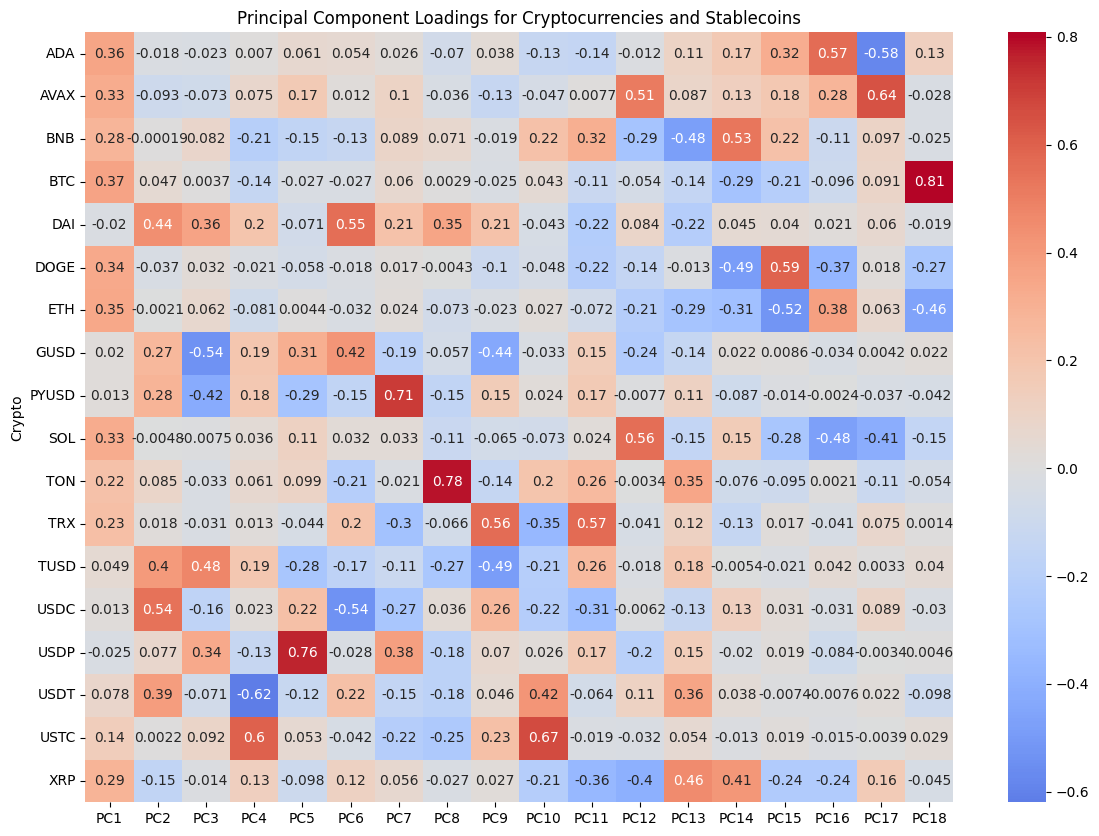

In [235]:
color = plt.get_cmap('coolwarm')   # default color
color.set_bad('lightblue') 
plt.figure(figsize=(14, 10))
sns.heatmap(loadings, annot=True, cmap=color, center=0)
plt.savefig('loading.pdf')
plt.title('Principal Component Loadings for Cryptocurrencies and Stablecoins')
plt.show()

In [226]:
# 8. Cumulative Explained Variance (to decide how many components to keep)
cumulative_variance = np.cumsum(explained_variance)

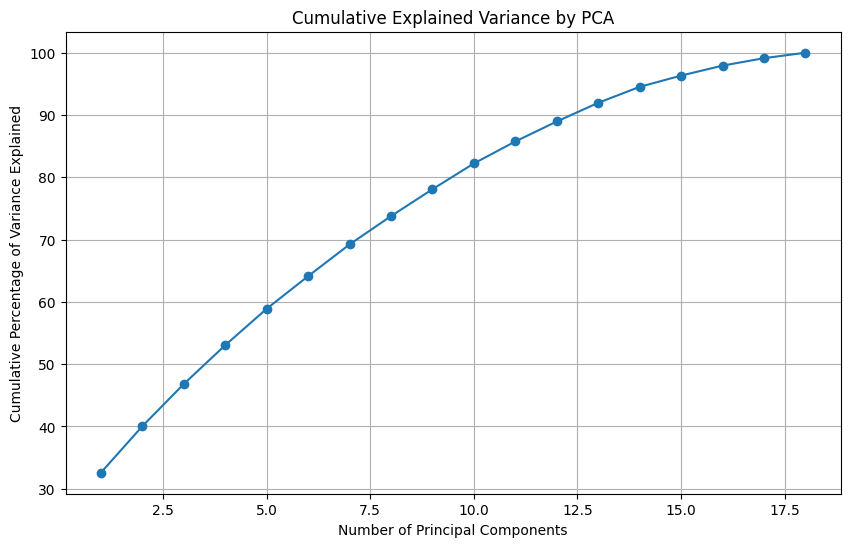

In [227]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance * 100, marker='o')
plt.ylabel('Cumulative Percentage of Variance Explained')
plt.xlabel('Number of Principal Components')
plt.title('Cumulative Explained Variance by PCA')
plt.grid(True)
plt.show()

In [181]:
!python --version

Python 3.9.18


In [228]:
corr_matrix = cleaned_returns.corr()

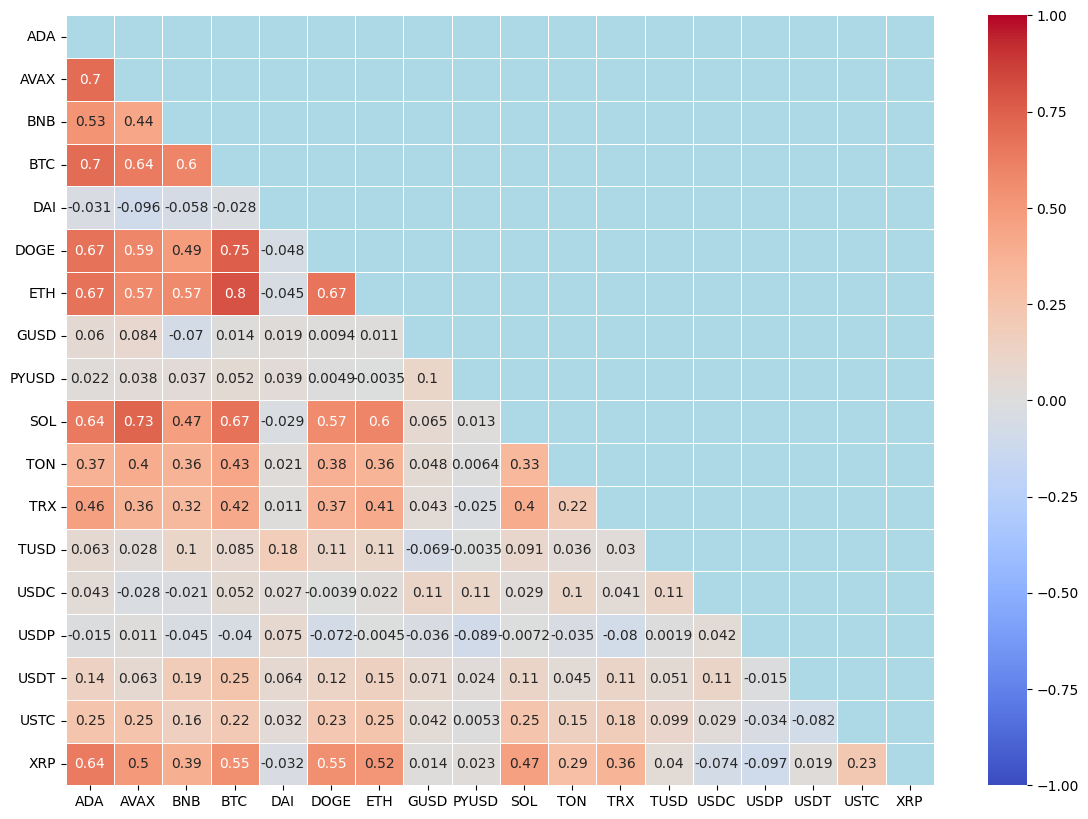

In [229]:
# Step 2: Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Step 3: Create a heatmap with the mask
color = plt.get_cmap('coolwarm')   # default color
color.set_bad('lightblue') 
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap=color, vmin=-1, vmax=1, linewidths=0.5)
plt.savefig('corr.pdf') 
# Step 4: Add titles and labels
plt.title("", fontsize=2)
plt.xlabel("", fontsize=2)
plt.ylabel("", fontsize=2)
plt.show()


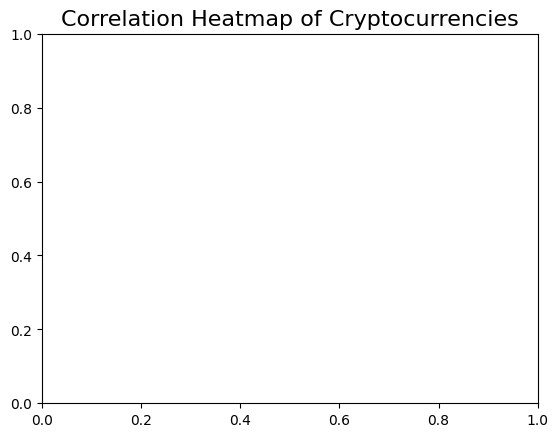

In [184]:
# Step 3: Add titles and labels


In [197]:
pivot_df.head()

Crypto,ADA,AVAX,BNB,BTC,BUSD,DAI,DOGE,ETH,EURS,GUSD,PYUSD,SOL,TON,TRX,TUSD,USDC,USDP,USDT,USTC,XRP
Timestamp,,,,,,,,,,,,,,,,,,,,
2023-09-22,0.2450,8.860,210.91,26583.16,0.9772,0.9999,0.06152,1593.13,0.92,1.001,1.0,19.42,0.0,0.08338,0.5095,1.0,0.9997,1.0000,0.01241,0.5122
2023-09-23,0.2462,8.900,210.27,26585.41,0.9772,1.0000,0.06151,1593.91,0.92,1.001,1.0,19.48,0.0,0.08365,0.9000,1.0,0.9971,1.0010,0.01258,0.5077
2023-09-24,0.2428,8.788,208.21,26261.44,0.9772,0.9998,0.06070,1580.76,0.92,0.999,1.0,19.36,0.0,0.08362,0.8300,1.0,0.9985,1.0010,0.01246,0.5021
2023-09-25,0.2459,8.940,209.81,26297.93,0.9772,0.9999,0.06093,1588.04,0.92,0.999,1.0,19.39,0.0,0.08464,0.9007,1.0,0.9993,0.9998,0.01253,0.5054
2023-09-26,0.2453,9.042,212.43,26212.59,0.9772,0.9999,0.06059,1593.27,0.92,0.998,1.0,19.02,0.0,0.08472,0.8662,1.0,0.9991,0.9997,0.01266,0.5017


In [200]:
cleaned_returns.isna().sum()

Crypto
ADA      0
AVAX     0
BNB      0
BTC      0
BUSD     0
DAI      0
DOGE     0
ETH      0
EURS     0
GUSD     0
PYUSD    0
SOL      0
TON      0
TRX      0
TUSD     0
USDC     0
USDP     0
USDT     0
USTC     0
XRP      0
dtype: int64

In [213]:
print(cleaned_returns.std())

Crypto
ADA      0.039458
AVAX     0.051535
BNB      0.031015
BTC      0.027910
DAI      0.000523
DOGE     0.048290
ETH      0.032795
GUSD     0.001326
PYUSD    0.000267
SOL      0.050334
TON      0.045211
TRX      0.019726
TUSD     0.075791
USDC     0.000084
USDP     0.009276
USDT     0.000437
USTC     0.104304
XRP      0.033365
dtype: float64
